# TPK4170 Robotics - Trajectory Generation
## 2016-09-29
### Lars Tingelstad

# Introduction

## Definitions of Path and Trajectory

### [Corke - Robotics, Vision and Control:](http://link.springer.com/book/10.1007%2F978-3-642-20144-8) 

A **path is a spatial construct** – a locus in space that leads from an initial pose to a final pose. A **trajectory is a path with specified timing**. For example there is a path from A to B, but there is a trajectory from A to B in $10\ \rm s$ or at $2\ \rm m/ \rm s$.

### [Siciliano et. al. - Robotics: ](http://link.springer.com/book/10.1007/978-1-84628-642-1)

A **path denotes the locus of points** in the **joint space**, or in the **operational space**, which the manipulator has to follow in the execution of the assigned motion; **a path is then a pure geometric description of motion**. On the other hand, **a trajectory is a path on which a timing law is specified**, for instance in terms of velocities and/or accelerations at each point.

#### Locus

In geometry, a locus (plural: loci) (Latin word for "place", "location") is a set of points (commonly, a line, a line segment, a curve or a surface), whose location satisfies or is determined by one or more specified conditions.

#### Joint Space 

The joint space (configuration space) denotes the space in which the $(n \times 1)$ vector
of joint variables
$$\boldsymbol{\mathrm{q}} = \begin{pmatrix} q_1\\ \vdots \\ q_n \end{pmatrix}$$ is defined; it is $q_i = \theta_i$ for a revolute joint and $q_i = d_i$ for a prismatic joint.

#### Operational Space 

Operational space is the space in which the manipulator task is specified, typically $\mathbb{R}^3$. A position and orientation can then be described by, e.g., a $(6 \times 1)$ vector $\boldsymbol{\mathrm{x}}_e$ of positions $\boldsymbol{\mathrm{p}}_e$ and Euler angles $\boldsymbol{\mathrm{\phi}}_e$ where
$$\boldsymbol{\mathrm{x}}_e = \begin{pmatrix} \boldsymbol{\mathrm{p}}_e \\\boldsymbol{\mathrm{\phi}}_e \end{pmatrix}.$$

## Examples 
### Standard Trajectory Generation

In [10]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/pIcxOGo7ieU" frameborder="0" allowfullscreen></iframe>

### Online Trajectory Generation

#### Tracking a Swinging Target with a Robot Manipulator using Visual Sensing

**Description from YouTube:**

In [27]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/0EAKonCFusg" frameborder="0" allowfullscreen></iframe>

#### Collision Avoidance Using the [Reflexxes Motion Libraries](http://www.reflexxes.ws/)

**Interactive notebook:**[![Binder](http://mybinder.org/badge.svg)](http://mybinder.org:/repo/tingelst/rmltypeii)

In [28]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/yLNDN0N8DRE" frameborder="0" allowfullscreen></iframe>

#### The Duel: Timo Boll vs. KUKA Robot

In [29]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/tIIJME8-au8" frameborder="0" allowfullscreen></iframe>

# Cubic Polynomials

In [1]:
qi = 0;
qf = pi;
dqi = 0;
dqf = 0;
t = 2;

In [2]:
A = [0, 0, 0, 1;
     t^3, t^2, t, 1;
     0, 0, 1, 0;
     3 * t^2, 2 * t, 1.0, 0.0]

A =

    0    0    0    1
    8    4    2    1
    0    0    1    0
   12    4    1    0



In [3]:
b = [qi, qf, dqi, dqf]'

b =

   0.00000
   3.14159
   0.00000
   0.00000



In [4]:
p = A \ b

p =

  -0.78540
   2.35619
   0.00000
   0.00000



In [5]:
ts = [0:0.01:t];

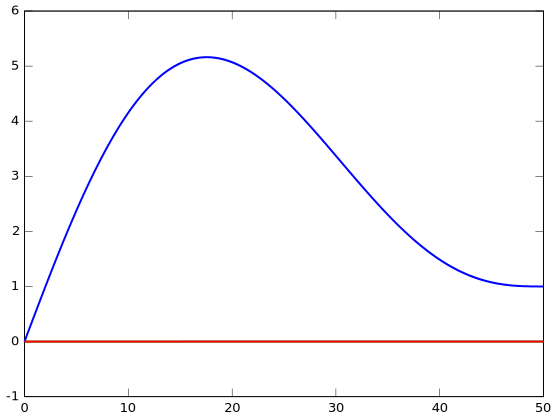

In [17]:
%plot inline -f 'svg'
plot(ts, polyval(p, ts), 'linewidth',2,
     ts, polyval([3 * p(1), 2 * p(2), p(3)],ts), 'linewidth',2,
     ts, polyval([6 * p(1), 2 * p(2)],ts),'linewidth',2)

In [30]:
%%%python
def cubic_trajectory(current_position, target_position, duration_in_seconds):
    import numpy as np
    import matplotlib.pyplot as plt
    qi = current_position
    qf = target_position
    t = duration_in_seconds
    
    xs = linspace(0,t)

    A = np.array([[0.0,0.0,0.0,1.0],
                  [t**3, t**2, t, 1.],
                  [0.0, 0.0, 1.0, 0.0],
                  [3.0 * t**2, 2*t, 1.0, 0.0]])

    b = np.array([qi, qf, 0.0, 0.0])
    x = np.linalg.solve(A,b)        

    qs = np.polyval(x, xs)
    dqs = np.polyval([3. * x[0], 2. * x[1], x[2]], xs)
    ddqs = np.polyval([6. * x[0], 2. * x[1]], xs)
    
    plt.plot(qs)
    plt.plot(dqs)
    plt.plot(ddqs)
    
cubic_trajectory(0,1,50)

python added to session magics.



Traceback (most recent call last):
  File "/home/main/anaconda2/lib/python2.7/site-packages/metakernel/magics/python_magic.py", line 19, in exec_code
    exec(code, env)
  File "<string>", line 26, in <module>
  File "<string>", line 8, in cubic_trajectory
NameError: global name 'linspace' is not defined



# Quintic Polynomials

In [7]:
qi = 0;
qf = 1;
dqi = 0.5;
dqf = 0;
ddqi = 0;
ddqf = 0;
t = 50;
ts = [0:0.01:t];

In [8]:
A = [0, 0, 0, 0, 0, 1;
     t^5, t^4, t^3, t^2, t, 1;
     0, 0, 0, 0, 1, 0;
     5*t^4, 4*t^3, 3*t^2, 2*t, 1, 0;
     0, 0, 0, 2, 0, 0;
     20*t^3, 12*t^2, 6*t, 2, 0, 0]

A =

           0           0           0           0           0           1
   312500000     6250000      125000        2500          50           1
           0           0           0           0           1           0
    31250000      500000        7500         100           1           0
           0           0           0           2           0           0
     2500000       30000         300           2           0           0



In [9]:
b = [qi, qf, dqi, dqf, ddqi, ddqf]'

b =

   0.00000
   1.00000
   0.50000
   0.00000
   0.00000
   0.00000



In [10]:
p = A \ b

p =

  -0.00000
   0.00003
  -0.00112
   0.00000
   0.50000
   0.00000



## Position

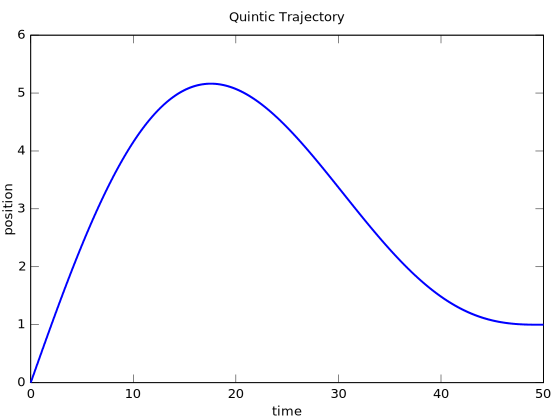

In [11]:
%plot inline -f 'svg'
plot(ts, polyval(p, ts), 'linewidth',2);
title ("Quintic Trajectory");
xlabel ("time");
ylabel ("position");

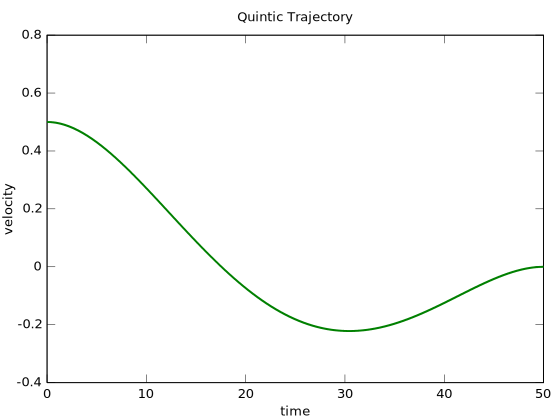

In [12]:
plot(ts, polyval([5 * p(1), 4 * p(2), 3 * p(3), 2 * p(4), p(5)], ts), 
     'linewidth', 2, 'color', [0, 0.5, 0])
title ("Quintic Trajectory");
xlabel ("time");
ylabel ("velocity");

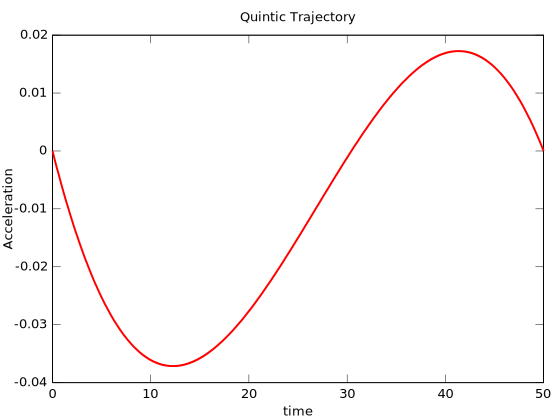

In [13]:
plot(ts, polyval([20 * p(1), 12 * p(2), 6 * p(3), 2 * p(4)], ts),
'linewidth',2, 'color', [1,0,0])
title ("Quintic Trajectory");
xlabel ("time");
ylabel ("Acceleration");

In [14]:
function [T,Q,dQ,ddQ] = lin_par(t,q_v,D_t,dq_i,dq_f,Ts)
%LIN_PAR Interpolating linear polynomials with parabolic blends.
%        [T,Q,dQ,ddQ] = LIN_PAR(t,q_v,D_t,dq_i,dq_f,Ts) returns a trajectory
%        of interpolating linear polynomials with parabolic blends, where:
%
%        q_v is vector of via points
%        t is vector of time instants
%        D_t is vector of durations of parabolic blends
%        dq_i and dq_f are initial and final velocities
%        Ts is sample time of trajectory
%        T, Q, dQ, ddQ are respectively vectors of time, position, velocity and
%          acceleration

% L. Villani, G. Oriolo, B. Siciliano
% February 2009

N = max(size(t));

% time steps
  S_t = t(2:N) - t(1:N-1);

% via points velocities
  dq_v = (q_v(2:N)-q_v(1:N-1))./S_t';
  dq_v = [dq_i dq_v dq_f];

% coefficients of linear segments
  a_0 = q_v(1:N-1);
  a_1 = dq_v(2:N);

% coefficients of parabolic blends
  b_2 = 0.5*(dq_v(2:N+1) - dq_v(1:N))./D_t(1:N)';
  b_1 = 0.5*(dq_v(2:N+1) + dq_v(1:N));
  b_0 = q_v(1:N) + (dq_v(2:N+1) - dq_v(1:N)).*D_t(1:N)'/8;

% trajectory computation
  T =[];
  Q = [];
  dQ = [];
  ddQ = [];

  for k=1:N-1,

  % parabolic blend
    t_p = (-0.5*D_t(k):Ts:(0.5*D_t(k) - Ts))';
    q_p = b_2(k)*t_p.^2 + b_1(k)*t_p + b_0(k);
    dq_p = 2*b_2(k)*t_p + b_1(k);
    ddq_p = 2*b_2(k)*ones(size(t_p,1),1);

  % linear segment
    t_l =  (0.5*D_t(k):Ts:S_t(k) - 0.5*D_t(k) - Ts)';
    q_l = a_1(k)*t_l + a_0(k);
    dq_l = a_1(k)*ones(size(t_l,1),1);
    ddq_l = zeros(size(t_l,1),1);

    T = [T; t(k) + t_p; t(k) + t_l];
    Q =[Q;q_p;q_l];
    dQ =[dQ;dq_p;dq_l];
    ddQ =[ddQ;ddq_p;ddq_l];

  end;

% last parabolic blend
  t_p = (-0.5*D_t(N):Ts:(0.5*D_t(N)-Ts))';
  q_p = b_2(N)*t_p.^2 + b_1(N)*t_p + b_0(N);
  dq_p = 2*b_2(N)*t_p + b_1(N);
  ddq_p = 2*b_2(N)*ones(size(t_p,1),1);

  T = [T; t(N) + t_p];
  Q =[Q;q_p];
  dQ =[dQ;dq_p];
  ddQ =[ddQ;ddq_p];
end

In [15]:
% time instants
  t = [0;2;4];

% via points vector
  q_v = [0 2 3];

% vector of durations of parabolic blends
  D_t = 0.2*ones(size(t));

% initial and final velocities
  dq_i = 0;
  dq_f = 0;

% sample time
  Ts = 0.01;

% trajectory generation
  [time,q,dq,ddq] = lin_par(t,q_v,D_t,dq_i,dq_f,Ts);

% plot
  %p4_6;

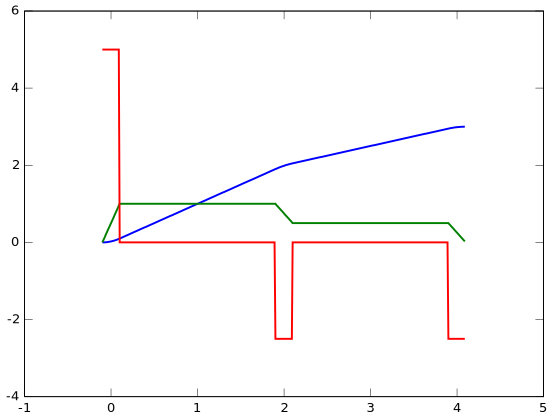

In [16]:
plot(time, q, 'linewidth',2,
     time, dq, 'linewidth',2,
     time, ddq,'linewidth',2)